Enter the Number of target: 50


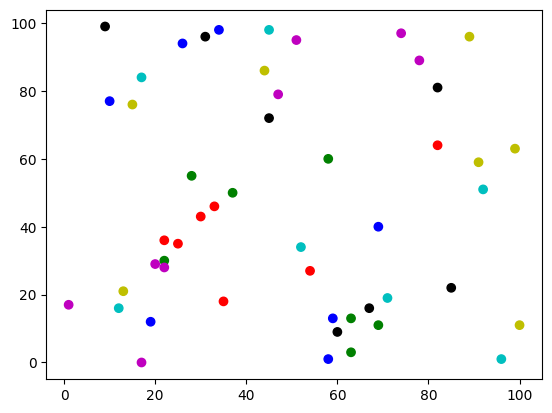

409865
Iteration  0  Completed  Current best fitness: =  2256
Iteration  1  Completed  Current best fitness: =  2186
Iteration  2  Completed  Current best fitness: =  2155
Iteration  3  Completed  Current best fitness: =  2099
Iteration  4  Completed  Current best fitness: =  2024
Iteration  5  Completed  Current best fitness: =  1918
Iteration  6  Completed  Current best fitness: =  1792
Iteration  7  Completed  Current best fitness: =  1792
Iteration  8  Completed  Current best fitness: =  1774
Iteration  9  Completed  Current best fitness: =  1740
Iteration  10  Completed  Current best fitness: =  1721
Iteration  11  Completed  Current best fitness: =  1683
Iteration  12  Completed  Current best fitness: =  1656
Iteration  13  Completed  Current best fitness: =  1621
Iteration  14  Completed  Current best fitness: =  1553
Iteration  15  Completed  Current best fitness: =  1553
Iteration  16  Completed  Current best fitness: =  1494
Iteration  17  Completed  Current best fitness: =  

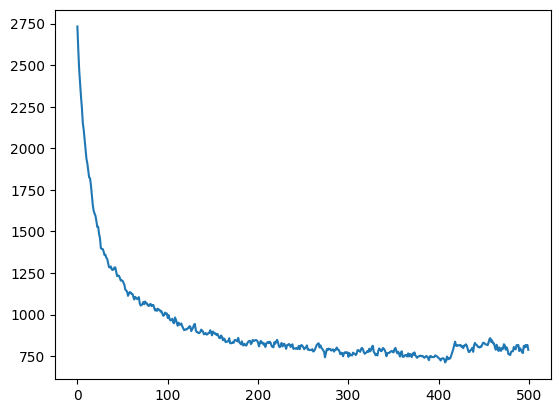

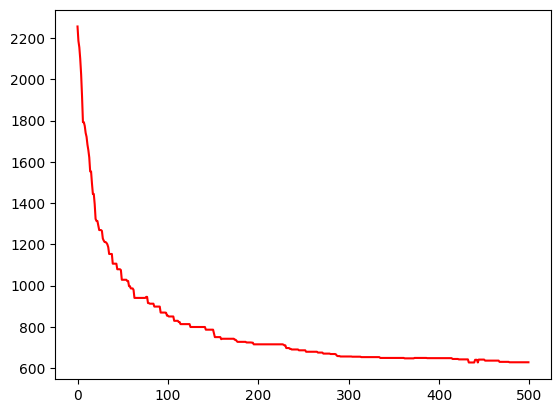

The best solution is:  [ 35.  27.  33.  41.   9.  25.  19.  31.   8.  36.   4.  15.  39.   3.
  40.   1.  29.  14.   6.  44.  17.  46.   0.  13.  10.  34.  24.  49.
  28.  47.  16.  23.  22.  20.  48.   5.  11.  21.  43.  45.  26.   7.
  32.  30.  38.   2.  12.  42.  37.  18. 627.]
Population size =  150  Crossover rate =  90 / 150  and Mutation rate =  0.001


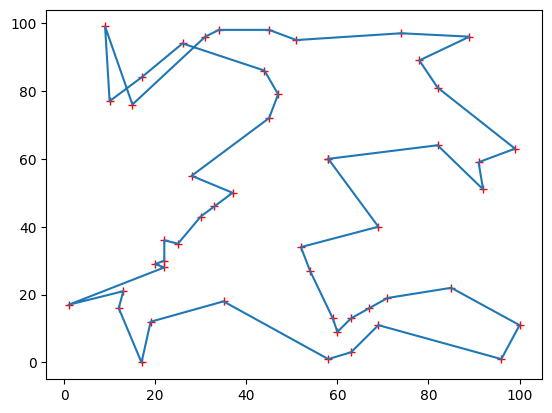

In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

def euclidean(a, b):
    dist = math.sqrt((a.x - b.x)**2 + (a.y - b.y)**2)
    return dist

def manhattan(a, b):
    dist = abs(a.x - b.x) + abs(a.y + b.y)
    return dist

class GA:
    def __init__(self, pop_size, target, crossover_threshold, mutation_rate):
        self.pop_size = pop_size
        self.target = target
        self.chromo_size = len(target)

        self.best_solution = []
        self.best_solution_fitness = 0

        self.distance_table = np.empty([self.chromo_size, self.chromo_size], dtype=np.uint8)
        self.mutation_rate = mutation_rate
        self.curr_pop = np.empty([self.pop_size, (self.chromo_size + 1)])
        self.fitness = []
        self.best_parents = []
        self.crossover_threshold = crossover_threshold

    def addtopop(self, arr):
        self.curr_pop = np.concatenate((self.curr_pop, arr))

    def replace_pop(self, arr):
        self.curr_pop = arr

    def generate_distance_table(self):
        for i in range(self.chromo_size):
            for j in range(self.chromo_size):
                if i == j:
                    self.distance_table[i][j] = 0
                else:
                    self.distance_table[i][j] = euclidean(self.target[i], self.target[j])

    def generate_manhattan_distance_table(self):
        for i in range(self.chromo_size):
            for j in range(self.chromo_size):
                if i == j:
                    self.distance_table[i][j] = 0
                else:
                    self.distance_table[i][j] = manhattan(self.target[i], self.target[j])

    def generate_random(self):
        nums = np.arange(self.chromo_size)

        for i in range(self.pop_size):
            np.random.shuffle(nums)
            self.curr_pop[i][0:self.chromo_size] = nums

    def get_fitness(self, arr):
        dist = 0
        for j in range(self.chromo_size - 1):
            dist += self.distance_table[int(arr[j])][int(arr[j + 1])]

        dist += self.distance_table[int(arr[0])][int(arr[self.chromo_size - 1])]

        return dist

    def gen_fitness_pop(self):
        self.fitness = []
        for i in range(self.pop_size):
            fitness = self.get_fitness(self.curr_pop[i])
            self.fitness.append(fitness)
            self.curr_pop[i][self.chromo_size] = fitness

    def selection(self):
        ''' Using the Roulette Wheel system'''
        n = self.crossover_threshold
        arr = []
        i = 0
        temp = [True, False]

        while i < n:
            tmp = random.randint(0, n - 1)
            prob = [1 - self.fitness[tmp], self.fitness[tmp]]
            choice = np.random.choice(temp, p=prob)

            if choice:
                arr.append(self.curr_pop[tmp])
                np.delete(self.curr_pop, tmp, 0)
                i += 1

        return arr

    def selection_ranking(self):
        ''' Using the ranking system'''
        n = self.crossover_threshold
        arr = []
        i = 0
        temp = [True, False]
        flag = True

        self.curr_pop = self.curr_pop[self.curr_pop[:, self.chromo_size].argsort()]

        while flag:
            prob = [1 - (i / self.pop_size), (i / self.pop_size)]
            choice = np.random.choice(temp, p=prob)

            if choice:
                arr.append(self.curr_pop[i])
                if len(arr) == n:
                    flag = False

            i = i + 1
            if i == self.pop_size:
                i = 0

        return arr

    def normalization(self):
        n = len(self.fitness)
        n_sum = sum(self.fitness)

        for i in range(n):
            self.fitness[i] = self.fitness[i] / n_sum

    def pmx_operation(self, parent_a, parent_b, crossover_point_1, crossover_point_2):
        kid_a = parent_a
        kid_b = parent_b

        kid_a[crossover_point_1:crossover_point_2] = parent_b[crossover_point_1:crossover_point_2]
        kid_b[crossover_point_1:crossover_point_2] = parent_a[crossover_point_1:crossover_point_2]

        string_b = parent_b[crossover_point_1:crossover_point_2]
        string_a = parent_a[crossover_point_1:crossover_point_2]

        relationsWithDupes = []
        for i in range(len(string_a)):
            relationsWithDupes.append([string_b[i], string_a[i]])

        relations = []
        for pair in relationsWithDupes:
            for i in range(len(relationsWithDupes)):
                if pair[0] in relationsWithDupes[i] or pair[1] in relationsWithDupes[i]:
                    if pair != relationsWithDupes[i]:
                        if pair[0] == relationsWithDupes[i][1]:
                            pair[0] = relationsWithDupes[i][0]
                        else:
                            pair[1] = relationsWithDupes[i][1]

            if pair not in relations and pair[::-1] not in relations:
                relations.append(pair)

        for i in kid_a[:crossover_point_1]:
            for x in relations:
                if i == x[0]:
                    i = x[1]

        for i in kid_a[crossover_point_2:]:
            for x in relations:
                if i == x[0]:
                    i = x[1]

        for i in kid_b[:crossover_point_1]:
            for x in relations:
                if i == x[1]:
                    i = x[0]

        for i in kid_b[crossover_point_2:]:
            for x in relations:
                if i == x[1]:
                    i = x[0]

        return kid_a, kid_b

    def order_operation(self, parent_a, parent_b, crossover_point_1, crossover_point_2):
        nums = range(self.chromo_size)

        kid_a = random.sample(nums, self.chromo_size)
        kid_b = random.sample(nums, self.chromo_size)

        kid_a[crossover_point_1:crossover_point_2] = parent_b[crossover_point_1:crossover_point_2]
        kid_b[crossover_point_1:crossover_point_2] = parent_a[crossover_point_1:crossover_point_2]

        string_a = parent_b[crossover_point_1:crossover_point_2]
        string_b = parent_a[crossover_point_1:crossover_point_2]

        t_1 = crossover_point_2
        t_2 = crossover_point_2

        for i in range(self.chromo_size):
            if t_1 >= self.chromo_size:
                t_1 = t_1 % self.chromo_size

            if parent_a[i] in string_a:
                pass
            else:
                kid_a[t_1] = parent_a[i]
                t_1 = t_1 + 1

            if t_2 >= self.chromo_size:
                t_2 = t_2 % self.chromo_size

            if parent_b[i] in string_b:
                pass
            else:
                kid_b[t_2] = parent_b[i]
                t_2 = t_2 + 1

        kid_a.append(0)
        kid_b.append(0)

        return kid_a, kid_b

    def crossover_new(self):
        arr = self.selection_ranking()
        n = len(arr)

        kids = []
        for i in range(n - 1):
            parent_a = arr[i]
            parent_b = arr[i + 1]
            # i = i+1
            temp = parent_a

            crossover_point_1 = random.randint(1, self.chromo_size - 1)
            crossover_point_2 = crossover_point_1 + random.randint(1, self.chromo_size - crossover_point_1)

            kid_a, kid_b = self.order_operation(parent_a, parent_b, crossover_point_1, crossover_point_2)

            kids.append(kid_a)
            kids.append(kid_b)

        for i in range(n):
            kids[i][self.chromo_size] = self.get_fitness(kids[i])

        kids = np.array(kids)
        self.addtopop(kids)
        self.curr_pop = self.curr_pop[self.curr_pop[:, self.chromo_size].argsort()]
        self.replace_pop(self.curr_pop[0:self.pop_size])

    def mutate(self):
        for i in range(self.pop_size):
            temp = [True, False]
            prob = [1 - self.mutation_rate, self.mutation_rate]

            for j in range(50):
                choice = np.random.choice(2, 1, p=prob)

                if choice:
                    n1 = random.randint(1, self.chromo_size - 1)
                    n2 = random.randint(1, self.chromo_size - 1)

                    if n1 != n2:
                        temp = self.curr_pop[i][n1]
                        self.curr_pop[i][n1] = self.curr_pop[i][n2]
                        self.curr_pop[i][n2] = temp
                    else:
                        n1 = j


def solve(target):
    np.set_printoptions(suppress=True)
    num_iters = 500
    pop_size = 150
    crossover_threshold = int(0.6 * pop_size)
    mutation_rate = 0.001

    genAlg = GA(pop_size, target, crossover_threshold, mutation_rate)
    genAlg.generate_distance_table()
    genAlg.generate_random()
    min_fitness_table = []
    fitness_table = []
    genAlg.gen_fitness_pop()
    print(sum(genAlg.fitness))
    genAlg.best_solution_fitness = min(genAlg.fitness)

    k = 0

    for i in range(num_iters):
        genAlg.gen_fitness_pop()

        if k > 50:
            if genAlg.chromo_size <= 20:
                break
            else:
                genAlg.mutation_rate = 0.005

        k += 1

        fitness_table.append(sum(genAlg.fitness) / genAlg.pop_size)
        min_fitness_table.append(min(genAlg.fitness))
        if min(genAlg.fitness) < genAlg.best_solution_fitness:
            k = 0
            genAlg.best_solution_fitness = min(genAlg.fitness)
            t = genAlg.fitness.index(min(genAlg.fitness))
            genAlg.best_solution = genAlg.curr_pop[t]

        # genAlg.normalization()
        genAlg.crossover_new()
        if i != num_iters:
            genAlg.mutate()

        print("Iteration ", i, " Completed", " Current best fitness: = ", min_fitness_table[i])

    genAlg.gen_fitness_pop()

    genAlg.gen_fitness_pop()
    print(sum(genAlg.fitness))

    plt.plot(fitness_table)
    plt.show()

    plt.clf()
    plt.plot(min_fitness_table, 'r')
    plt.show()

    final_target = []
    for i in range(genAlg.chromo_size):
        final_target.append(genAlg.target[int(genAlg.best_solution[i])])

    print("The best solution is: ", np.array(genAlg.best_solution))
    print(
        "Population size = ", pop_size, " Crossover rate = ", crossover_threshold, "/", pop_size, " and Mutation rate = ",
        mutation_rate)
    target_points.plot_path(final_target)


class target_points:
    '''Target points class, with x and y points'''

    def __init__(self, num):
        y = int(num / 101)
        x = int(num % 101)

        self.x = x
        self.y = y

    def plot(target):
        n = len(target)
        x = []
        y = []
        for i in range(n):
            x.append(target[i].x)
            y.append(target[i].y)

        a = n % 7
        b = int(n / 7)

        clrs = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        colors = random.sample(clrs, a)
        for i in range(b):
            colors = colors + random.sample(clrs, 7)

        plt.scatter(x, y, c=colors)
        plt.show()

    def plot_path(target):
        n = len(target)
        x = []
        y = []
        for i in range(n):
            x.append(target[i].x)
            y.append(target[i].y)

        x.append(x[0])
        y.append(y[0])

        plt.plot(x, y, 'r+')
        plt.plot(x, y)
        plt.show()


def make_targets(n):
    '''Creates 10201 numbers from which 50 are randomly picked out'''
    nums = range(10201)
    points = random.sample(nums, n)

    target = []

    for i in points:
        target.append(target_points(i))

    return target


def geneticAlgo(target):
    solve(target)


if __name__ == "__main__":
    flag = True
    i = 0
    while flag:
        n = input("Enter the Number of target: ")
        n = int(n)
        if n < 10:
            print("Why do you need code for that? Enter something greater than 10!")
        elif n > 100 and n < 500:
            ans = input("It will take a long time. Do you wish to continue y/n? : ")
            if ans == 'y':
                flag = False
        elif n >= 500:
            print("Enter less than 500 targets, PLEASE!")
            i += 1
            if i > 10:
                flag = False
        else:
            flag = False

    target = make_targets(n)
    target_points.plot(target)
    geneticAlgo(target)
